## 벌커선 : 2828628

In [1]:
import pandas as pd

# load dataset
df1_path = '../vessel_data/벌커선+항로별+Co2+Nox+발생량+데이터+셋.csv'
df2_path = '../vessel_data/벌커선+선박별+Co2+Nox+발생량+데이터+셋+한글컬럼.csv'
df1 = pd.read_csv(df1_path, encoding='utf-8')
df2 = pd.read_csv(df2_path, encoding='utf-8')

# route / vessel
df_route = df1[df1['IMO_IDNTF_NO'] == 2197316] # 특정 선박의 데이터 추출 (2197316)
df_vessel = df2[df2['국제해사기구식별번호'] == 2197316]

print(df_route.head())


                          YMD       MMSI  IMO_IDNTF_NO         LA         LO  \
7194724  22-Mar-2023 06:00:00  680095333       2197316 -25.728001 -48.309898   
7194725  22-Mar-2023 12:00:00  680095333       2197316 -25.728001 -48.309700   
7194726  22-Mar-2023 18:00:00  680095333       2197316 -25.727501 -48.309700   
7194727  23-Mar-2023 00:00:00  680095333       2197316 -25.728800 -48.310001   
7194728  23-Mar-2023 06:00:00  680095333       2197316 -25.729401 -48.309700   

               VE  SH_DRCN  DRAFT  NVGTN_DIST  WAVE_HGHT  ...   WNDRC_V  \
7194724  0.019271       98    7.5    0.115627       0.62  ...  0.438740   
7194725  0.052276      108    7.5    0.313659       0.59  ...  0.999392   
7194726  0.019813      113    7.5    0.118880       0.64  ...  2.420910   
7194727  0.033398       80    7.5    0.200392       0.92  ...  0.069106   
7194728  0.018513       60    7.5    0.111076       1.15  ... -2.920130   

         ADDTI_RSTC  TOT_RSTC  RL_POWER  FUEL_CNSMP_QTY         CDBX

In [3]:
print(df_vessel.head())

      해상이동업무식별번호  국제해사기구식별번호           선박명          선박종류   선박폭   선박길이  선박높이  \
8137   680095333     2197316  IluvwDqjhoxv  Bulk carrier  32.3  225.3  20.0   

     선박소유자명    흘수            조선소명  ...     평균풍속      부가저항       총저항  실제힘  \
8137      3  14.5  BdqjclPlwvxlVE  ...  7.89769  114229.0  350998.0  0.0   

           연료소모량        이산화탄소       질소산화물      황산화물      메테인  선박에너지효율운항지수  
8137  5871590000  18824300000  18702400.0  210782.0  55007.0       4.0375  

[1 rows x 36 columns]


In [4]:
import pandas as pd
import numpy as np

# 1. 데이터셋 로드 및 초기 정보 출력
print("1. 데이터셋 로드 및 초기 상태 확인")
df1_path = '../vessel_data/벌커선+항로별+Co2+Nox+발생량+데이터+셋.csv'
df2_path = '../vessel_data/벌커선+선박별+Co2+Nox+발생량+데이터+셋+한글컬럼.csv'

# 특정 선박(IMO: 2197316)의 데이터 추출
df1 = pd.read_csv(df1_path, encoding='utf-8')
df_route = df1[df1['IMO_IDNTF_NO'] == 2197316]
print(f"df_route 크기: {df_route.shape} (행 × 열)")

df2 = pd.read_csv(df2_path, encoding='utf-8')
df_vessel = df2[df2['국제해사기구식별번호'] == 2197316]
print(f"df_vessel 크기: {df_vessel.shape} (행 × 열)")

# 2. 컬럼명 매핑 정의 (영문 -> 한글)
print("\n2. 컬럼명 매핑 정의")
column_mapping = {
    'YMD': '일자',
    'MMSI': '해상이동무선식별번호',
    'IMO_IDNTF_NO': '국제해사기구식별번호',
    'LA': '위도',
    'LO': '경도',
    'VE': '속도',
    'SH_DRCN': '선수방향',
    'DRAFT': '흘수',
    'NVGTN_DIST': '운항거리',
    'WAVE_HGHT': '파도높이',
    'WAVE_CYCL': '파도주기',
    'WNDRC_U': '풍향U',
    'WNDRC_V': '풍향V',
    'ADDTI_RSTC': '부가저항',
    'TOT_RSTC': '총저항',
    'RL_POWER': '실제력',
    'FUEL_CNSMP_QTY': '연료소모량',
    'CDBX': '이산화탄소',
    'NOX': '질소산화물',
    'SOX': '황산화물',
    'MTHN': '메테인',
    'SHIP_NRG_EFFCN_NVGTN_IDX': '선박에너지효율운항지수'
}

# 3. df_route의 컬럼명을 한글로 변경
print("\n3. df_route 컬럼명 한글로 변경")
print(f"변경 전 컬럼: {df_route.columns.tolist()[:5]}... (첫 5개만 표시)")
df_route_renamed = df_route.rename(columns=column_mapping)
print(f"변경 후 컬럼: {df_route_renamed.columns.tolist()[:5]}... (첫 5개만 표시)")

# 4. 날짜/시간 처리 및 공통 키 확인
print("\n4. 날짜/시간 처리 및 공통 키 확인")

# df_route의 날짜/시간 형식 확인
print(f"df_route '일자' 컬럼 예시: {df_route_renamed['일자'].iloc[0]}")

# df_vessel의 날짜/시간 관련 컬럼 확인
time_cols_vessel = [col for col in df_vessel.columns if '시각' in col or '일자' in col]
print(f"df_vessel의 시간 관련 컬럼: {time_cols_vessel}")

# 5. 날짜/시간 처리 및 병합 준비
print("\n5. 날짜/시간 처리 및 병합 준비")

# df_route의 '일자' 컬럼을 datetime으로 변환
try:
    df_route_renamed['일자'] = pd.to_datetime(df_route_renamed['일자'])
    print("✅ df_route '일자' 컬럼 datetime 변환 성공")
except Exception as e:
    print(f"❌ df_route '일자' 컬럼 변환 오류: {e}")
    # 오류 발생 시 대체 방법
    try:
        df_route_renamed['일자'] = pd.to_datetime(df_route_renamed['일자'], format='%d-%b-%Y %H:%M:%S')
        print("✅ 특정 형식으로 변환 성공")
    except:
        pass

# df_vessel의 시간 관련 컬럼을 datetime으로 변환 (있는 경우)
for col in time_cols_vessel:
    try:
        df_vessel[col] = pd.to_datetime(df_vessel[col])
        print(f"✅ df_vessel '{col}' 컬럼 datetime 변환 성공")
    except Exception as e:
        print(f"❌ df_vessel '{col}' 컬럼 변환 오류: {e}")

# 6. 병합 방식 결정
print("\n6. 병합 방식 결정")

# 데이터 특성 확인
print(f"df_route_renamed 고유 국제해사기구식별번호: {df_route_renamed['국제해사기구식별번호'].unique()}")
print(f"df_vessel 고유 국제해사기구식별번호: {df_vessel['국제해사기구식별번호'].unique()}")

# 날짜/시간 기준으로 병합할 수 있는지 확인
if len(time_cols_vessel) > 0:
    # 시간 범위 확인
    min_route_date = df_route_renamed['일자'].min()
    max_route_date = df_route_renamed['일자'].max()
    print(f"df_route 시간 범위: {min_route_date} ~ {max_route_date}")
    
    for col in time_cols_vessel:
        if pd.api.types.is_datetime64_any_dtype(df_vessel[col]):
            min_vessel_date = df_vessel[col].min()
            max_vessel_date = df_vessel[col].max()
            print(f"df_vessel '{col}' 시간 범위: {min_vessel_date} ~ {max_vessel_date}")

# 7. 병합 수행
print("\n7. 병합 수행")

# 기본 병합 방법: IMO로 병합
merged_df = pd.merge(
    df_route_renamed,
    df_vessel,
    left_on='국제해사기구식별번호',
    right_on='국제해사기구식별번호',
    how='inner'
)

print(f"기본 병합 결과: {merged_df.shape} (행 × 열)")

# 대체 병합 방법: 시간 기준 병합 (필요한 경우)
if '출발시각' in df_vessel.columns and pd.api.types.is_datetime64_any_dtype(df_vessel['출발시각']):
    print("\n시간 기준 병합 시도:")
    
    # df_route의 각 행에 대해 해당하는 시간 범위 내의 df_vessel 행을 찾기
    result_rows = []
    
    for _, route_row in df_route_renamed.iterrows():
        route_time = route_row['일자']
        
        # 해당 시간이 출발시각과 도착시각 사이에 있는 vessel 행 찾기
        matching_vessel_rows = df_vessel[
            (df_vessel['출발시각'] <= route_time) & 
            (df_vessel['도착시각'] >= route_time)
        ]
        
        # 매칭되는 행이 있으면 병합하여 결과에 추가
        if len(matching_vessel_rows) > 0:
            for _, vessel_row in matching_vessel_rows.iterrows():
                # 두 행 병합
                combined_row = {**route_row.to_dict(), **vessel_row.to_dict()}
                result_rows.append(combined_row)
    
    # 결과를 DataFrame으로 변환
    time_merged_df = pd.DataFrame(result_rows)
    print(f"시간 기준 병합 결과: {len(time_merged_df)}개 행")
    
    # 결과가 있으면 이를 사용
    if len(time_merged_df) > 0:
        merged_df = time_merged_df
        print("✅ 시간 기준 병합으로 대체합니다.")

# 중복 컬럼 확인
duplicate_cols = [col for col in merged_df.columns if col.endswith('_x') or col.endswith('_y')]
if duplicate_cols:
    print(f"중복 컬럼: {duplicate_cols}")

# 8. NaN 값 처리
print("\n8. NaN 값 처리")
nan_count_before = merged_df.isna().sum().sum()
print(f"NaN 값 개수 (삭제 전): {nan_count_before}")

# NaN 값이 있는 행 삭제
merged_df_cleaned = merged_df.dropna()
nan_count_after = merged_df_cleaned.isna().sum().sum()
print(f"NaN 값 개수 (삭제 후): {nan_count_after}")
print(f"삭제된 행 수: {len(merged_df) - len(merged_df_cleaned)}")
print(f"최종 데이터셋 크기: {merged_df_cleaned.shape} (행 × 열)")

# 9. 최종 결과 확인
print("\n9. 최종 결과 확인")
print("병합된 데이터 샘플:")
print(merged_df_cleaned.head(3))

# 10. 결과 저장
output_file = '../vessel_data/벌커선_IMO_2197316_통합데이터.csv'
merged_df_cleaned.to_csv(output_file, index=False, encoding='utf-8')
print(f"\n✅ 통합 데이터가 저장되었습니다: {output_file}")

# 요약 정보 출력
print("\n데이터 병합 요약:")
print(f"- 원본 df_route: {len(df_route)}개 행")
print(f"- 원본 df_vessel: {len(df_vessel)}개 행")
print(f"- 병합 후: {len(merged_df)}개 행")
print(f"- NaN 제거 후: {len(merged_df_cleaned)}개 행")
print(f"- 최종 컬럼 수: {len(merged_df_cleaned.columns)}개")

1. 데이터셋 로드 및 초기 상태 확인
df_route 크기: (1458, 22) (행 × 열)
df_vessel 크기: (1, 36) (행 × 열)

2. 컬럼명 매핑 정의

3. df_route 컬럼명 한글로 변경
변경 전 컬럼: ['YMD', 'MMSI', 'IMO_IDNTF_NO', 'LA', 'LO']... (첫 5개만 표시)
변경 후 컬럼: ['일자', '해상이동무선식별번호', '국제해사기구식별번호', '위도', '경도']... (첫 5개만 표시)

4. 날짜/시간 처리 및 공통 키 확인
df_route '일자' 컬럼 예시: 22-Mar-2023 06:00:00
df_vessel의 시간 관련 컬럼: ['출발시각', '도착시각']

5. 날짜/시간 처리 및 병합 준비
✅ df_route '일자' 컬럼 datetime 변환 성공
✅ df_vessel '출발시각' 컬럼 datetime 변환 성공
✅ df_vessel '도착시각' 컬럼 datetime 변환 성공

6. 병합 방식 결정
df_route_renamed 고유 국제해사기구식별번호: [2197316]
df_vessel 고유 국제해사기구식별번호: [2197316]
df_route 시간 범위: 2023-01-01 12:00:00 ~ 2023-12-31 18:00:00
df_vessel '출발시각' 시간 범위: 2023-01-01 12:00:00 ~ 2023-01-01 12:00:00
df_vessel '도착시각' 시간 범위: 2023-12-31 18:00:00 ~ 2023-12-31 18:00:00

7. 병합 수행
기본 병합 결과: (1458, 57) (행 × 열)

시간 기준 병합 시도:


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15292\2653093019.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vessel[col] = pd.to_datetime(df_vessel[col])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15292\2653093019.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vessel[col] = pd.to_datetime(df_vessel[col])


시간 기준 병합 결과: 1458개 행
✅ 시간 기준 병합으로 대체합니다.

8. NaN 값 처리
NaN 값 개수 (삭제 전): 0
NaN 값 개수 (삭제 후): 0
삭제된 행 수: 0
최종 데이터셋 크기: (1458, 47) (행 × 열)

9. 최종 결과 확인
병합된 데이터 샘플:
                   일자  해상이동무선식별번호  국제해사기구식별번호         위도         경도        속도  \
0 2023-03-22 06:00:00   680095333     2197316 -25.728001 -48.309898  0.019271   
1 2023-03-22 12:00:00   680095333     2197316 -25.728001 -48.309700  0.052276   
2 2023-03-22 18:00:00   680095333     2197316 -25.727501 -48.309700  0.019813   

   선수방향    흘수     운항거리  파도높이  ...    도착지경도     평균속도     최대속도   파도최대주기  \
0    98  14.5  56894.2  0.62  ...  149.584  10.3381  14.0576  19.2308   
1   108  14.5  56894.2  0.59  ...  149.584  10.3381  14.0576  19.2308   
2   113  14.5  56894.2  0.64  ...  149.584  10.3381  14.0576  19.2308   

    파도평균주기  파도최대높이   파도평균높이     최대풍속     평균풍속  실제힘  
0  8.41425    7.19  1.46438  39.8626  7.89769  0.0  
1  8.41425    7.19  1.46438  39.8626  7.89769  0.0  
2  8.41425    7.19  1.46438  39.8626  7.89769  0.0  

[3 rows x 

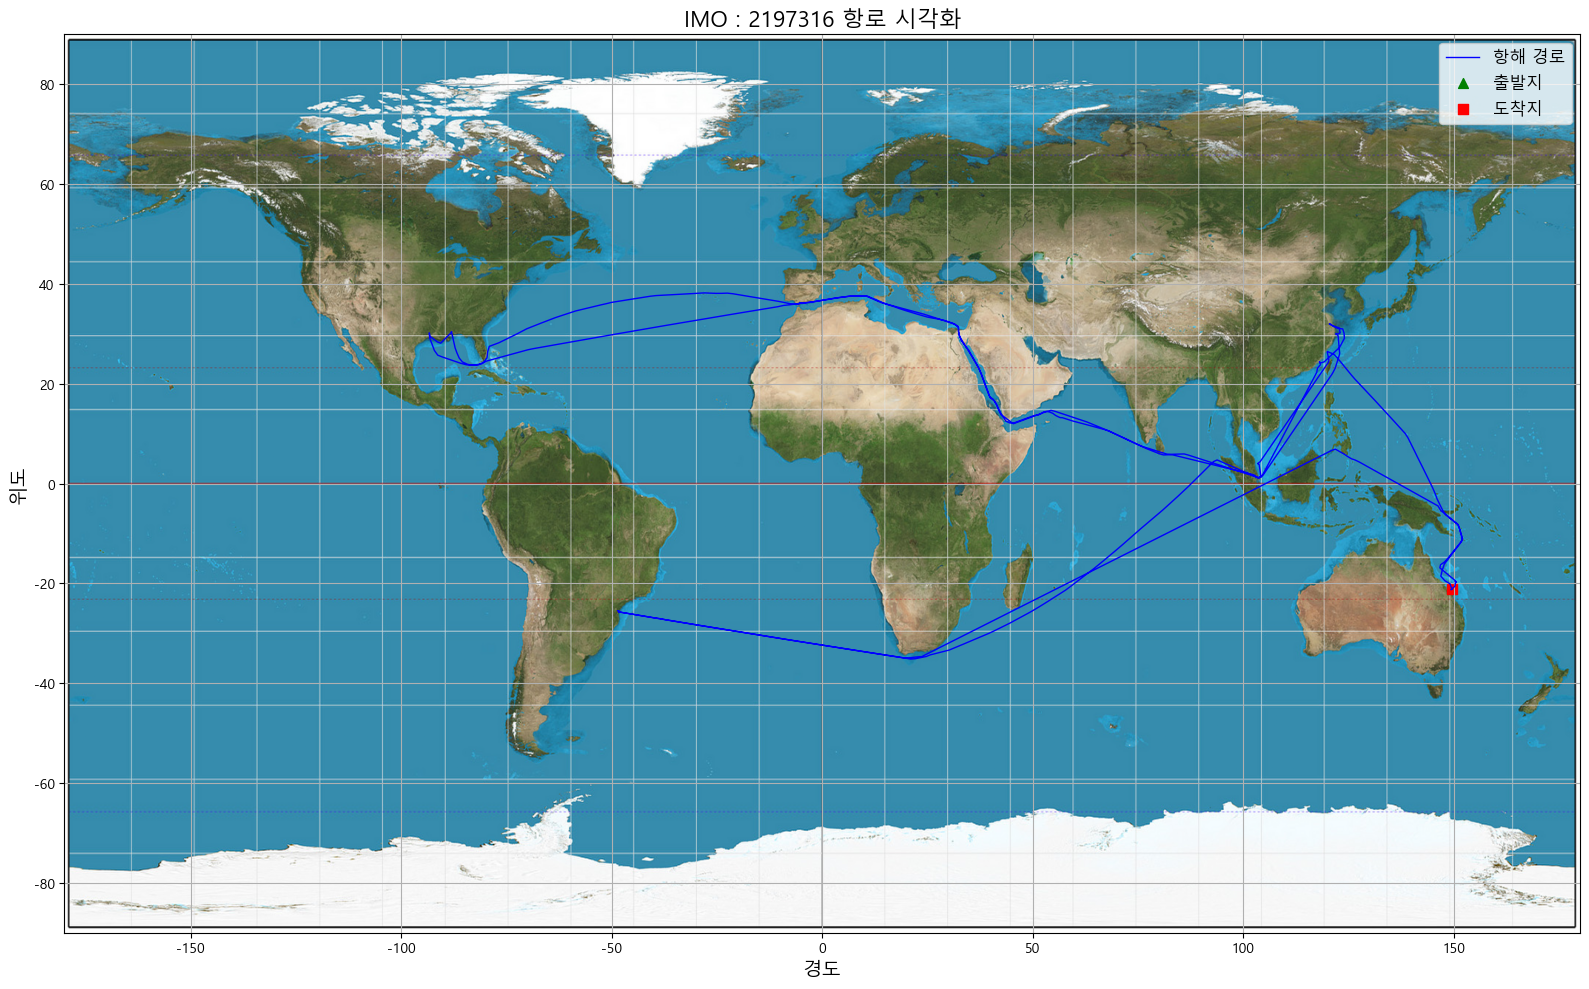

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.image as mpimg

# CSV 파일 로드
file_path = "../vessel_data/벌커선_IMO_2197316_통합데이터.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# 출발 및 도착 시각을 datetime 형식으로 변환
df['출발시각'] = pd.to_datetime(df['출발시각'], errors='coerce')
df['도착시각'] = pd.to_datetime(df['도착시각'], errors='coerce')

# 출발/도착 위도 경도 가져오기
departure_points = df[['출발시각', '출발지위도', '출발지경도']].dropna().drop_duplicates()
arrival_points = df[['도착시각', '도착지위도', '도착지경도']].dropna().drop_duplicates()

# 궤적 데이터 (중간 항해 경로 포함)
trajectory_df = df[['일자', '위도', '경도']].dropna()
trajectory_df['일자'] = pd.to_datetime(trajectory_df['일자'])

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

# 지도 이미지 불러오기
img = mpimg.imread("../vessel_data/world_map.png")
img_extent = [-180, 180, -90, 90]  # 세계 지도 위경도 범위


# 시각화 시작
plt.figure(figsize=(16, 10))

# 세계지도 배경
plt.imshow(img, extent=img_extent, aspect='auto')

# 전체 항로 궤적
plt.plot(trajectory_df['경도'], trajectory_df['위도'], color='blue', label='항해 경로', linewidth=1)

# 출발지점 표시
plt.scatter(departure_points['출발지경도'], departure_points['출발지위도'], color='green', label='출발지', s=50, marker='^')

# 도착지점 표시
plt.scatter(arrival_points['도착지경도'], arrival_points['도착지위도'], color='red', label='도착지', s=50, marker='s')

# 라벨 및 설명
plt.title("IMO : 2197316 항로 시각화", fontsize=16)
plt.xlabel("경도", fontsize=14)
plt.ylabel("위도", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


## 컨테이너선 : 2557372

In [8]:
import pandas as pd

# 1. 데이터 기본 정보 확인
df1_path = '../vessel_data/컨테이너선+항로별+Co2+Nox+발생량+데이터+셋.csv'
df2_path = '../vessel_data/컨테이너선+선박별+Co2+Nox+발생량+데이터+셋.csv'
df1 = pd.read_csv(df1_path, encoding='utf-8')
df2 = pd.read_csv(df2_path, encoding='utf-8')

# route / vessel
df_route = df1[df1['IMO_IDNTF_NO'] == 2557372] # 특정 선박의 데이터 추출 (2557372)
df_vessel = df2[df2['IMO_IDNTF_NO'] == 2557372]

print(df_route.head())


                          YMD       MMSI  IMO_IDNTF_NO       LA         LO  \
5659289  01-Jan-2023 12:00:00  969346283       2557372 -10.6290 -25.736500   
5659290  01-Jan-2023 18:00:00  969346283       2557372 -11.5804 -24.504101   
5659291  02-Jan-2023 00:00:00  969346283       2557372 -11.8550 -24.240900   
5659292  02-Jan-2023 06:00:00  969346283       2557372 -11.8617 -24.365101   
5659293  02-Jan-2023 12:00:00  969346283       2557372 -11.8663 -24.495399   

               VE  SH_DRCN  DRAFT  NVGTN_DIST  WAVE_HGHT  ...  WNDRC_V  \
5659289   0.00000      124   10.7     0.00000       2.29  ...  1.44098   
5659290  15.41200      123   10.7    92.47200       2.08  ...  2.48012   
5659291   5.26536      184   10.7    31.59220       2.09  ...  2.60359   
5659292   1.33383        0   10.7     8.00303       2.08  ...  3.06307   
5659293   1.37768      177   10.7     8.26609       2.07  ...  1.49383   

         ADDTI_RSTC  TOT_RSTC  RL_POWER  FUEL_CNSMP_QTY         CDBX  \
5659289     47

In [11]:
# 2. 컬럼명 매핑 정의 (영문 -> 한글)
print("\n2. 컬럼명 매핑 정의")
# df_route 컬럼 매핑 (기존 코드)
route_column_mapping = {
    'YMD': '일자',
    'MMSI': '해상이동무선식별번호',
    'IMO_IDNTF_NO': '국제해사기구식별번호',
    'LA': '위도',
    'LO': '경도',
    'VE': '속도',
    'SH_DRCN': '선수방향',
    'DRAFT': '흘수',
    'NVGTN_DIST': '운항거리',
    'WAVE_HGHT': '파도높이',
    'WAVE_CYCL': '파도주기',
    'WNDRC_U': '풍향U',
    'WNDRC_V': '풍향V',
    'ADDTI_RSTC': '부가저항',
    'TOT_RSTC': '총저항',
    'RL_POWER': '실제력',
    'FUEL_CNSMP_QTY': '연료소모량',
    'CDBX': '이산화탄소',
    'NOX': '질소산화물',
    'SOX': '황산화물',
    'MTHN': '메테인',
    'SHIP_NRG_EFFCN_NVGTN_IDX': '선박에너지효율운항지수'
}

# df_vessel 컬럼 매핑 (사진 기반 추가)
vessel_column_mapping = {
    'MMSI': '해상이동업무식별번호',
    'IMO_IDNTF_NO': '국제해사기구식별번호',
    'SHIP_NM': '선박명',
    'SHIP_KIND': '선박종류',
    'SHIP_WDTH': '선박폭',
    'SHIP_LNTH': '선박길이',
    'SHIP_HGHT': '선박높이',
    'SHIP_OWNER_NM': '선박소유자명',
    'DRAFT': '흘수',
    'SHPYRD_NM': '조선소명',
    'BULD_YR': '건축년도',
    'DDWGHT': '재화중량',
    'DPTR_HMS': '출발시각',
    'ARVL_HMS': '도착시각',
    'DPTRP_LA': '출발지위도',
    'DPTRP_LO': '출발지경도',
    'DTNT_LA': '도착지위도',
    'DTNT_LO': '도착지경도',
    'AVE_VE': '평균속도',
    'MAX_VE': '최대속도',
    'NVGTN_DIST': '운항거리',
    'WAVE_MAX_CYCL': '파도최대주기',
    'WAVE_AVE_CYCL': '파도평균주기',
    'WAVE_MAX_HGHT': '파도최대높이',
    'WAVE_AVE_HGHT': '파도평균높이',
    'MAX_WDSP': '최대풍속',
    'AVE_WDSP': '평균풍속',
    'ADDTI_RSTC': '부가저항',
    'TOT_RSTC': '총저항',
    'RL_POWER': '실제힘',
    'FUEL_CNSMP_QTY': '연료소모량',
    'CDBX': '이산화탄소',
    'NOX': '질소산화물',
    'SOX': '황산화물',
    'MTHN': '메테인',
    'SHIP_NRG_EFFCN_NVGTN_IDX': '선박에너지효율운항지수'
}

# 3. df_route와 df_vessel의 컬럼명을 한글로 변경
print("\n3. 두 데이터프레임 컬럼명 한글로 변경")

# df_route 컬럼명 변경
print(f"df_route 변경 전 컬럼: {df_route.columns.tolist()[:5]}... (첫 5개만 표시)")
df_route_renamed = df_route.rename(columns=route_column_mapping)
print(f"df_route 변경 후 컬럼: {df_route_renamed.columns.tolist()[:5]}... (첫 5개만 표시)")

# df_vessel 컬럼명 변경 (새로 추가)
print(f"df_vessel 변경 전 컬럼: {df_vessel.columns.tolist()[:5]}... (첫 5개만 표시)")
df_vessel_renamed = df_vessel.rename(columns=vessel_column_mapping)
print(f"df_vessel 변경 후 컬럼: {df_vessel_renamed.columns.tolist()[:5]}... (첫 5개만 표시)")

# df_vessel 컬럼명 변경 결과 확인
print("\ndf_vessel 컬럼명 변경 전후 비교:")
original_cols = df_vessel.columns.tolist()
renamed_cols = df_vessel_renamed.columns.tolist()

for i, (orig, renamed) in enumerate(zip(original_cols, renamed_cols)):
    if orig != renamed:
        print(f"{i+1}. {orig} → {renamed}")
    else:
        print(f"{i+1}. {orig} (변경 없음)")

# 4. 날짜/시간 처리 및 공통 키 확인
print("\n4. 날짜/시간 처리 및 공통 키 확인")

# df_route의 날짜/시간 형식 확인
print(f"df_route '일자' 컬럼 예시: {df_route_renamed['일자'].iloc[0]}")

# df_vessel의 날짜/시간 관련 컬럼 확인 (이름 변경 후)
time_cols_vessel = [col for col in df_vessel_renamed.columns if '시각' in col or '일자' in col]
print(f"df_vessel의 시간 관련 컬럼: {time_cols_vessel}")

# 5. 날짜/시간을 기준으로 병합 준비
print("\n5. 날짜/시간 처리 및 병합 준비")

# df_route의 '일자' 컬럼을 datetime으로 변환
try:
    df_route_renamed['일자'] = pd.to_datetime(df_route_renamed['일자'])
    print("✅ df_route '일자' 컬럼 datetime 변환 성공")
except Exception as e:
    print(f"❌ df_route '일자' 컬럼 변환 오류: {e}")
    # 오류 발생 시 대체 방법
    try:
        df_route_renamed['일자'] = pd.to_datetime(df_route_renamed['일자'], format='%d-%b-%Y %H:%M:%S')
        print("✅ 특정 형식으로 변환 성공")
    except:
        pass

# df_vessel의 시간 관련 컬럼을 datetime으로 변환 (있는 경우)
for col in time_cols_vessel:
    try:
        df_vessel_renamed[col] = pd.to_datetime(df_vessel_renamed[col])
        print(f"✅ df_vessel '{col}' 컬럼 datetime 변환 성공")
    except Exception as e:
        print(f"❌ df_vessel '{col}' 컬럼 변환 오류: {e}")

# 6. 병합 방식 결정
print("\n6. 병합 방식 결정")

# 데이터 특성 확인
print(f"df_route_renamed 고유 국제해사기구식별번호: {df_route_renamed['국제해사기구식별번호'].unique()}")
print(f"df_vessel_renamed 고유 국제해사기구식별번호: {df_vessel_renamed['국제해사기구식별번호'].unique()}")

# 날짜/시간 기준으로 병합할 수 있는지 확인
if len(time_cols_vessel) > 0:
    # 시간 범위 확인
    min_route_date = df_route_renamed['일자'].min()
    max_route_date = df_route_renamed['일자'].max()
    print(f"df_route 시간 범위: {min_route_date} ~ {max_route_date}")
    
    for col in time_cols_vessel:
        if pd.api.types.is_datetime64_any_dtype(df_vessel_renamed[col]):
            min_vessel_date = df_vessel_renamed[col].min()
            max_vessel_date = df_vessel_renamed[col].max()
            print(f"df_vessel '{col}' 시간 범위: {min_vessel_date} ~ {max_vessel_date}")

# 7. 병합 수행
print("\n7. 병합 수행")

# 기본 병합 방법: IMO로 병합 (이제 한글 컬럼명 사용)
merged_df = pd.merge(
    df_route_renamed,
    df_vessel_renamed,
    on='국제해사기구식별번호',  # 양쪽 모두 같은 컬럼명 사용
    how='inner'
)

print(f"기본 병합 결과: {merged_df.shape} (행 × 열)")

# 대체 병합 방법: 시간 기준 병합 (필요한 경우)
if '출발시각' in df_vessel_renamed.columns and pd.api.types.is_datetime64_any_dtype(df_vessel_renamed['출발시각']):
    print("\n시간 기준 병합 시도:")
    
    # df_route의 각 행에 대해 해당하는 시간 범위 내의 df_vessel 행을 찾기
    result_rows = []
    
    for _, route_row in df_route_renamed.iterrows():
        route_time = route_row['일자']
        
        # 해당 시간이 출발시각과 도착시각 사이에 있는 vessel 행 찾기
        matching_vessel_rows = df_vessel_renamed[
            (df_vessel_renamed['출발시각'] <= route_time) & 
            (df_vessel_renamed['도착시각'] >= route_time)
        ]
        
        # 매칭되는 행이 있으면 병합하여 결과에 추가
        if len(matching_vessel_rows) > 0:
            for _, vessel_row in matching_vessel_rows.iterrows():
                # 두 행 병합
                combined_row = {**route_row.to_dict(), **vessel_row.to_dict()}
                result_rows.append(combined_row)
    
    # 결과를 DataFrame으로 변환
    time_merged_df = pd.DataFrame(result_rows)
    print(f"시간 기준 병합 결과: {len(time_merged_df)}개 행")
    
    # 결과가 있으면 이를 사용
    if len(time_merged_df) > 0:
        merged_df = time_merged_df
        print("✅ 시간 기준 병합으로 대체합니다.")

# 중복 컬럼 확인
duplicate_cols = [col for col in merged_df.columns if col.endswith('_x') or col.endswith('_y')]
if duplicate_cols:
    print(f"중복 컬럼: {duplicate_cols}")
    
    # 중복 컬럼 처리 (예: '_x' 컬럼 유지)
    for col in duplicate_cols:
        if col.endswith('_x'):
            base_col = col[:-2]  # '_x' 제거
            merged_df[base_col] = merged_df[col]
    
    # 중복 컬럼 삭제
    merged_df = merged_df.drop(columns=duplicate_cols)
    print("✅ 중복 컬럼 처리 완료")

# 8. NaN 값 처리
print("\n8. NaN 값 처리")
nan_count_before = merged_df.isna().sum().sum()
print(f"NaN 값 개수 (삭제 전): {nan_count_before}")

# NaN 값이 있는 행 삭제
merged_df_cleaned = merged_df.dropna()
nan_count_after = merged_df_cleaned.isna().sum().sum()
print(f"NaN 값 개수 (삭제 후): {nan_count_after}")
print(f"삭제된 행 수: {len(merged_df) - len(merged_df_cleaned)}")
print(f"최종 데이터셋 크기: {merged_df_cleaned.shape} (행 × 열)")

# 9. 최종 결과 확인
print("\n9. 최종 결과 확인")
print("병합된 데이터 샘플:")
print(merged_df_cleaned.head(3))

# 10. 결과 저장
output_file = '../vessel_data/컨테이너선_IMO_2557372_통합데이터_한글컬럼.csv'
merged_df_cleaned.to_csv(output_file, index=False, encoding='utf-8')
print(f"\n✅ 통합 데이터가 저장되었습니다: {output_file}")

# 요약 정보 출력
print("\n데이터 병합 요약:")
print(f"- 원본 df_route: {len(df_route)}개 행")
print(f"- 원본 df_vessel: {len(df_vessel)}개 행")
print(f"- 한글 변환 후 df_route_renamed: {len(df_route_renamed)}개 행")
print(f"- 한글 변환 후 df_vessel_renamed: {len(df_vessel_renamed)}개 행")
print(f"- 병합 후: {len(merged_df)}개 행")
print(f"- NaN 제거 후: {len(merged_df_cleaned)}개 행")
print(f"- 최종 컬럼 수: {len(merged_df_cleaned.columns)}개")


2. 컬럼명 매핑 정의

3. 두 데이터프레임 컬럼명 한글로 변경
df_route 변경 전 컬럼: ['YMD', 'MMSI', 'IMO_IDNTF_NO', 'LA', 'LO']... (첫 5개만 표시)
df_route 변경 후 컬럼: ['일자', '해상이동무선식별번호', '국제해사기구식별번호', '위도', '경도']... (첫 5개만 표시)
df_vessel 변경 전 컬럼: ['MMSI', 'IMO_IDNTF_NO', 'SHIP_NM', 'SHIP_KIND', 'SHIP_WDTH']... (첫 5개만 표시)
df_vessel 변경 후 컬럼: ['해상이동업무식별번호', '국제해사기구식별번호', '선박명', '선박종류', '선박폭']... (첫 5개만 표시)

df_vessel 컬럼명 변경 전후 비교:
1. MMSI → 해상이동업무식별번호
2. IMO_IDNTF_NO → 국제해사기구식별번호
3. SHIP_NM → 선박명
4. SHIP_KIND → 선박종류
5. SHIP_WDTH → 선박폭
6. SHIP_LNTH → 선박길이
7. SHIP_HGHT → 선박높이
8. SHIP_OWNER_NM → 선박소유자명
9. DRAFT → 흘수
10. SHPYRD_NM → 조선소명
11. BULD_YR → 건축년도
12. DDWGHT → 재화중량
13. DPTR_HMS → 출발시각
14. ARVL_HMS → 도착시각
15. DPTRP_LA → 출발지위도
16. DPTRP_LO → 출발지경도
17. DTNT_LA → 도착지위도
18. DTNT_LO → 도착지경도
19. AVE_VE → 평균속도
20. MAX_VE → 최대속도
21. NVGTN_DIST → 운항거리
22. WAVE_MAX_CYCL → 파도최대주기
23. WAVE_AVE_CYCL → 파도평균주기
24. WAVE_MAX_HGHT → 파도최대높이
25. WAVE_AVE_HGHT → 파도평균높이
26. MAX_WDSP → 최대풍속
27. AVE_WDSP → 평균풍속
28. ADDTI_RSTC → 부가저항
29. TOT_R

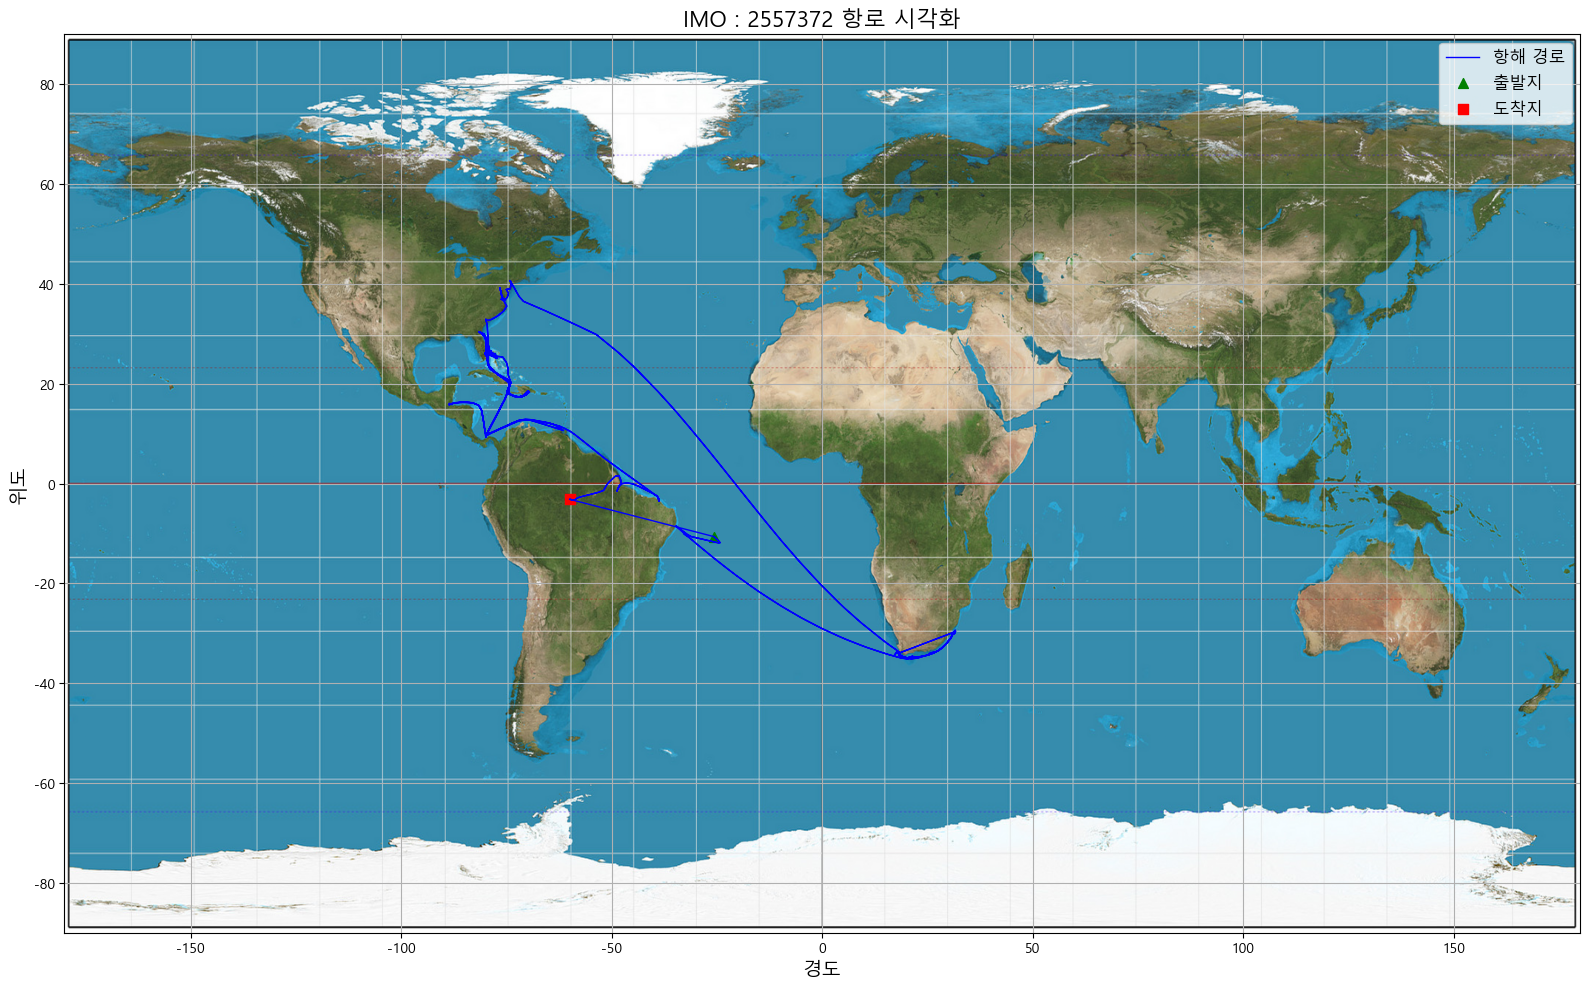

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.image as mpimg

# CSV 파일 로드
file_path = "../vessel_data/컨테이너선_IMO_2557372_통합데이터_한글컬럼.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# 출발 및 도착 시각을 datetime 형식으로 변환
df['출발시각'] = pd.to_datetime(df['출발시각'], errors='coerce')
df['도착시각'] = pd.to_datetime(df['도착시각'], errors='coerce')

# 출발/도착 위도 경도 가져오기
departure_points = df[['출발시각', '출발지위도', '출발지경도']].dropna().drop_duplicates()
arrival_points = df[['도착시각', '도착지위도', '도착지경도']].dropna().drop_duplicates()

# 궤적 데이터 (중간 항해 경로 포함)
trajectory_df = df[['일자', '위도', '경도']].dropna()
trajectory_df['일자'] = pd.to_datetime(trajectory_df['일자'])

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

# 지도 이미지 불러오기
img = mpimg.imread("../vessel_data/world_map.png")
img_extent = [-180, 180, -90, 90]  # 세계 지도 위경도 범위


# 시각화 시작
plt.figure(figsize=(16, 10))

# 세계지도 배경
plt.imshow(img, extent=img_extent, aspect='auto')

# 전체 항로 궤적
plt.plot(trajectory_df['경도'], trajectory_df['위도'], color='blue', label='항해 경로', linewidth=1)

# 출발지점 표시
plt.scatter(departure_points['출발지경도'], departure_points['출발지위도'], color='green', label='출발지', s=50, marker='^')

# 도착지점 표시
plt.scatter(arrival_points['도착지경도'], arrival_points['도착지위도'], color='red', label='도착지', s=50, marker='s')

# 라벨 및 설명
plt.title("IMO : 2557372 항로 시각화", fontsize=16)
plt.xlabel("경도", fontsize=14)
plt.ylabel("위도", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


## 탱커선 : 33

In [29]:
import pandas as pd

# 1. 데이터 기본 정보 확인
df1_path = '../vessel_data/탱커선+항로별+Co2+Nox+발생량+데이터+셋.csv'
df2_path = '../vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv'
df1 = pd.read_csv(df1_path, encoding='utf-8')
df2 = pd.read_csv(df2_path, encoding='utf-8')

# route / vessel
df_route = df1[df1['IMO_IDNTF_NO'] == 33] # 특정 선박의 데이터 추출 (264039)
df_vessel = df2[df2['IMO_IDNTF_NO'] == 33]

print(df_route.head())


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15292\417261061.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(df1_path, encoding='utf-8')


                          YMD       MMSI         LA          LO         VE  \
5498208  01-Jan-2021 00:00:00  413467540  38.847000  121.723999   0.323255   
5498209  02-Jan-2021 00:00:00  413467540  39.562000  120.991997  10.059500   
5498210  02-Jan-2021 18:00:00  413467540  38.577599  120.999001   2.654660   
5498211  03-Jan-2021 00:00:00  413467540  40.301701  121.359001   0.021347   
5498212  03-Jan-2021 06:00:00  413467540  40.259899  121.371002   7.811720   

         SH_DRCN  IMO_IDNTF_NO  DRAFT  CRG_TYP  NVGTN_DIST  ...   WNDRC_V  \
5498208      198            33    0.0      0.0   14179.200  ... -5.645380   
5498209       16            33    0.0      0.0  111782.000  ... -1.338370   
5498210      339            33    0.0      0.0   88495.800  ... -4.478190   
5498211       40            33    0.0      0.0     237.214  ... -0.451880   
5498212      312            33    0.0      0.0   86804.000  ...  0.740068   

         ADDTI_RSTC    TOT_RSTC  RL_POWER  FUEL_CNSMP_QTY CDBX  NOX 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15292\417261061.py:7: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(df2_path, encoding='utf-8')


In [ ]:
# 2. 컬럼명 매핑 정의 (영문 -> 한글)
print("\n2. 컬럼명 매핑 정의")
# df_route 컬럼 매핑 (기존 코드)
route_column_mapping = {
    'YMD': '일자',
    'MMSI': '해상이동무선식별번호',
    'IMO_IDNTF_NO': '국제해사기구식별번호',
    'LA': '위도',
    'LO': '경도',
    'VE': '속도',
    'SH_DRCN': '선수방향',
    'DRAFT': '흘수',
    'NVGTN_DIST': '운항거리',
    'WAVE_HGHT': '파도높이',
    'WAVE_CYCL': '파도주기',
    'WNDRC_U': '풍향U',
    'WNDRC_V': '풍향V',
    'ADDTI_RSTC': '부가저항',
    'TOT_RSTC': '총저항',
    'RL_POWER': '실제력',
    'FUEL_CNSMP_QTY': '연료소모량',
    'CDBX': '이산화탄소',
    'NOX': '질소산화물',
    'SOX': '황산화물',
    'MTHN': '메테인',
    'SHIP_NRG_EFFCN_NVGTN_IDX': '선박에너지효율운항지수'
}

# df_vessel 컬럼 매핑 (사진 기반 추가)
vessel_column_mapping = {
    'MMSI': '해상이동업무식별번호',
    'IMO_IDNTF_NO': '국제해사기구식별번호',
    'SHIP_NM': '선박명',
    'SHIP_KIND': '선박종류',
    'SHIP_WDTH': '선박폭',
    'SHIP_LNTH': '선박길이',
    'SHIP_HGHT': '선박높이',
    'SHIP_OWNER_NM': '선박소유자명',
    'DRAFT': '흘수',
    'SHPYRD_NM': '조선소명',
    'BULD_YR': '건축년도',
    'DDWGHT': '재화중량',
    'DPTR_HMS': '출발시각',
    'ARVL_HMS': '도착시각',
    'DPTRP_LA': '출발지위도',
    'DPTRP_LO': '출발지경도',
    'DTNT_LA': '도착지위도',
    'DTNT_LO': '도착지경도',
    'AVE_VE': '평균속도',
    'MAX_VE': '최대속도',
    'NVGTN_DIST': '운항거리',
    'WAVE_MAX_CYCL': '파도최대주기',
    'WAVE_AVE_CYCL': '파도평균주기',
    'WAVE_MAX_HGHT': '파도최대높이',
    'WAVE_AVE_HGHT': '파도평균높이',
    'MAX_WDSP': '최대풍속',
    'AVE_WDSP': '평균풍속',
    'ADDTI_RSTC': '부가저항',
    'TOT_RSTC': '총저항',
    'RL_POWER': '실제힘',
    'FUEL_CNSMP_QTY': '연료소모량',
    'CDBX': '이산화탄소',
    'NOX': '질소산화물',
    'SOX': '황산화물',
    'MTHN': '메테인',
    'SHIP_NRG_EFFCN_NVGTN_IDX': '선박에너지효율운항지수'
}

# 3. df_route와 df_vessel의 컬럼명을 한글로 변경
print("\n3. 두 데이터프레임 컬럼명 한글로 변경")

# df_route 컬럼명 변경
print(f"df_route 변경 전 컬럼: {df_route.columns.tolist()[:5]}... (첫 5개만 표시)")
df_route_renamed = df_route.rename(columns=route_column_mapping)
print(f"df_route 변경 후 컬럼: {df_route_renamed.columns.tolist()[:5]}... (첫 5개만 표시)")

# df_vessel 컬럼명 변경 (새로 추가)
print(f"df_vessel 변경 전 컬럼: {df_vessel.columns.tolist()[:5]}... (첫 5개만 표시)")
df_vessel_renamed = df_vessel.rename(columns=vessel_column_mapping)
print(f"df_vessel 변경 후 컬럼: {df_vessel_renamed.columns.tolist()[:5]}... (첫 5개만 표시)")

# df_vessel 컬럼명 변경 결과 확인
print("\ndf_vessel 컬럼명 변경 전후 비교:")
original_cols = df_vessel.columns.tolist()
renamed_cols = df_vessel_renamed.columns.tolist()

for i, (orig, renamed) in enumerate(zip(original_cols, renamed_cols)):
    if orig != renamed:
        print(f"{i+1}. {orig} → {renamed}")
    else:
        print(f"{i+1}. {orig} (변경 없음)")

# 4. 날짜/시간 처리 및 공통 키 확인
print("\n4. 날짜/시간 처리 및 공통 키 확인")

# df_route의 날짜/시간 형식 확인
print(f"df_route '일자' 컬럼 예시: {df_route_renamed['일자'].iloc[0]}")

# df_vessel의 날짜/시간 관련 컬럼 확인 (이름 변경 후)
time_cols_vessel = [col for col in df_vessel_renamed.columns if '시각' in col or '일자' in col]
print(f"df_vessel의 시간 관련 컬럼: {time_cols_vessel}")

# 5. 날짜/시간을 기준으로 병합 준비
print("\n5. 날짜/시간 처리 및 병합 준비")

# df_route의 '일자' 컬럼을 datetime으로 변환
try:
    df_route_renamed['일자'] = pd.to_datetime(df_route_renamed['일자'])
    print("✅ df_route '일자' 컬럼 datetime 변환 성공")
except Exception as e:
    print(f"❌ df_route '일자' 컬럼 변환 오류: {e}")
    # 오류 발생 시 대체 방법
    try:
        df_route_renamed['일자'] = pd.to_datetime(df_route_renamed['일자'], format='%d-%b-%Y %H:%M:%S')
        print("✅ 특정 형식으로 변환 성공")
    except:
        pass

# df_vessel의 시간 관련 컬럼을 datetime으로 변환 (있는 경우)
for col in time_cols_vessel:
    try:
        df_vessel_renamed[col] = pd.to_datetime(df_vessel_renamed[col])
        print(f"✅ df_vessel '{col}' 컬럼 datetime 변환 성공")
    except Exception as e:
        print(f"❌ df_vessel '{col}' 컬럼 변환 오류: {e}")

# 6. 병합 방식 결정
print("\n6. 병합 방식 결정")

# 데이터 특성 확인
print(f"df_route_renamed 고유 국제해사기구식별번호: {df_route_renamed['국제해사기구식별번호'].unique()}")
print(f"df_vessel_renamed 고유 국제해사기구식별번호: {df_vessel_renamed['국제해사기구식별번호'].unique()}")

# 날짜/시간 기준으로 병합할 수 있는지 확인
if len(time_cols_vessel) > 0:
    # 시간 범위 확인
    min_route_date = df_route_renamed['일자'].min()
    max_route_date = df_route_renamed['일자'].max()
    print(f"df_route 시간 범위: {min_route_date} ~ {max_route_date}")
    
    for col in time_cols_vessel:
        if pd.api.types.is_datetime64_any_dtype(df_vessel_renamed[col]):
            min_vessel_date = df_vessel_renamed[col].min()
            max_vessel_date = df_vessel_renamed[col].max()
            print(f"df_vessel '{col}' 시간 범위: {min_vessel_date} ~ {max_vessel_date}")

# 7. 병합 수행
print("\n7. 병합 수행")

# 기본 병합 방법: IMO로 병합 (이제 한글 컬럼명 사용)
merged_df = pd.merge(
    df_route_renamed,
    df_vessel_renamed,
    on='국제해사기구식별번호',  # 양쪽 모두 같은 컬럼명 사용
    how='inner'
)

print(f"기본 병합 결과: {merged_df.shape} (행 × 열)")

# 대체 병합 방법: 시간 기준 병합 (필요한 경우)
if '출발시각' in df_vessel_renamed.columns and pd.api.types.is_datetime64_any_dtype(df_vessel_renamed['출발시각']):
    print("\n시간 기준 병합 시도:")
    
    # df_route의 각 행에 대해 해당하는 시간 범위 내의 df_vessel 행을 찾기
    result_rows = []
    
    for _, route_row in df_route_renamed.iterrows():
        route_time = route_row['일자']
        
        # 해당 시간이 출발시각과 도착시각 사이에 있는 vessel 행 찾기
        matching_vessel_rows = df_vessel_renamed[
            (df_vessel_renamed['출발시각'] <= route_time) & 
            (df_vessel_renamed['도착시각'] >= route_time)
        ]
        
        # 매칭되는 행이 있으면 병합하여 결과에 추가
        if len(matching_vessel_rows) > 0:
            for _, vessel_row in matching_vessel_rows.iterrows():
                # 두 행 병합
                combined_row = {**route_row.to_dict(), **vessel_row.to_dict()}
                result_rows.append(combined_row)
    
    # 결과를 DataFrame으로 변환
    time_merged_df = pd.DataFrame(result_rows)
    print(f"시간 기준 병합 결과: {len(time_merged_df)}개 행")
    
    # 결과가 있으면 이를 사용
    if len(time_merged_df) > 0:
        merged_df = time_merged_df
        print("✅ 시간 기준 병합으로 대체합니다.")

# 중복 컬럼 확인
duplicate_cols = [col for col in merged_df.columns if col.endswith('_x') or col.endswith('_y')]
if duplicate_cols:
    print(f"중복 컬럼: {duplicate_cols}")
    
    # 중복 컬럼 처리 (예: '_x' 컬럼 유지)
    for col in duplicate_cols:
        if col.endswith('_x'):
            base_col = col[:-2]  # '_x' 제거
            merged_df[base_col] = merged_df[col]
    
    # 중복 컬럼 삭제
    merged_df = merged_df.drop(columns=duplicate_cols)
    print("✅ 중복 컬럼 처리 완료")

# 8. NaN 값 처리
print("\n8. NaN 값 처리")
nan_count_before = merged_df.isna().sum().sum()
print(f"NaN 값 개수 (삭제 전): {nan_count_before}")

# NaN 값이 있는 행 삭제
merged_df_cleaned = merged_df.dropna()
nan_count_after = merged_df_cleaned.isna().sum().sum()
print(f"NaN 값 개수 (삭제 후): {nan_count_after}")
print(f"삭제된 행 수: {len(merged_df) - len(merged_df_cleaned)}")
print(f"최종 데이터셋 크기: {merged_df_cleaned.shape} (행 × 열)")

# 9. 최종 결과 확인
print("\n9. 최종 결과 확인")
print("병합된 데이터 샘플:")
print(merged_df_cleaned.head(3))

# 10. 결과 저장
output_file = '../vessel_data/탱커선_IMO_33_통합데이터_한글컬럼.csv'
merged_df_cleaned.to_csv(output_file, index=False, encoding='utf-8')
print(f"\n✅ 통합 데이터가 저장되었습니다: {output_file}")

# 요약 정보 출력
print("\n데이터 병합 요약:")
print(f"- 원본 df_route: {len(df_route)}개 행")
print(f"- 원본 df_vessel: {len(df_vessel)}개 행")
print(f"- 한글 변환 후 df_route_renamed: {len(df_route_renamed)}개 행")
print(f"- 한글 변환 후 df_vessel_renamed: {len(df_vessel_renamed)}개 행")
print(f"- 병합 후: {len(merged_df)}개 행")
print(f"- NaN 제거 후: {len(merged_df_cleaned)}개 행")
print(f"- 최종 컬럼 수: {len(merged_df_cleaned.columns)}개")

FileNotFoundError: [Errno 2] No such file or directory: '../vessel_data/탱커선_IMO_33_통합데이터_한글컬럼.csv'

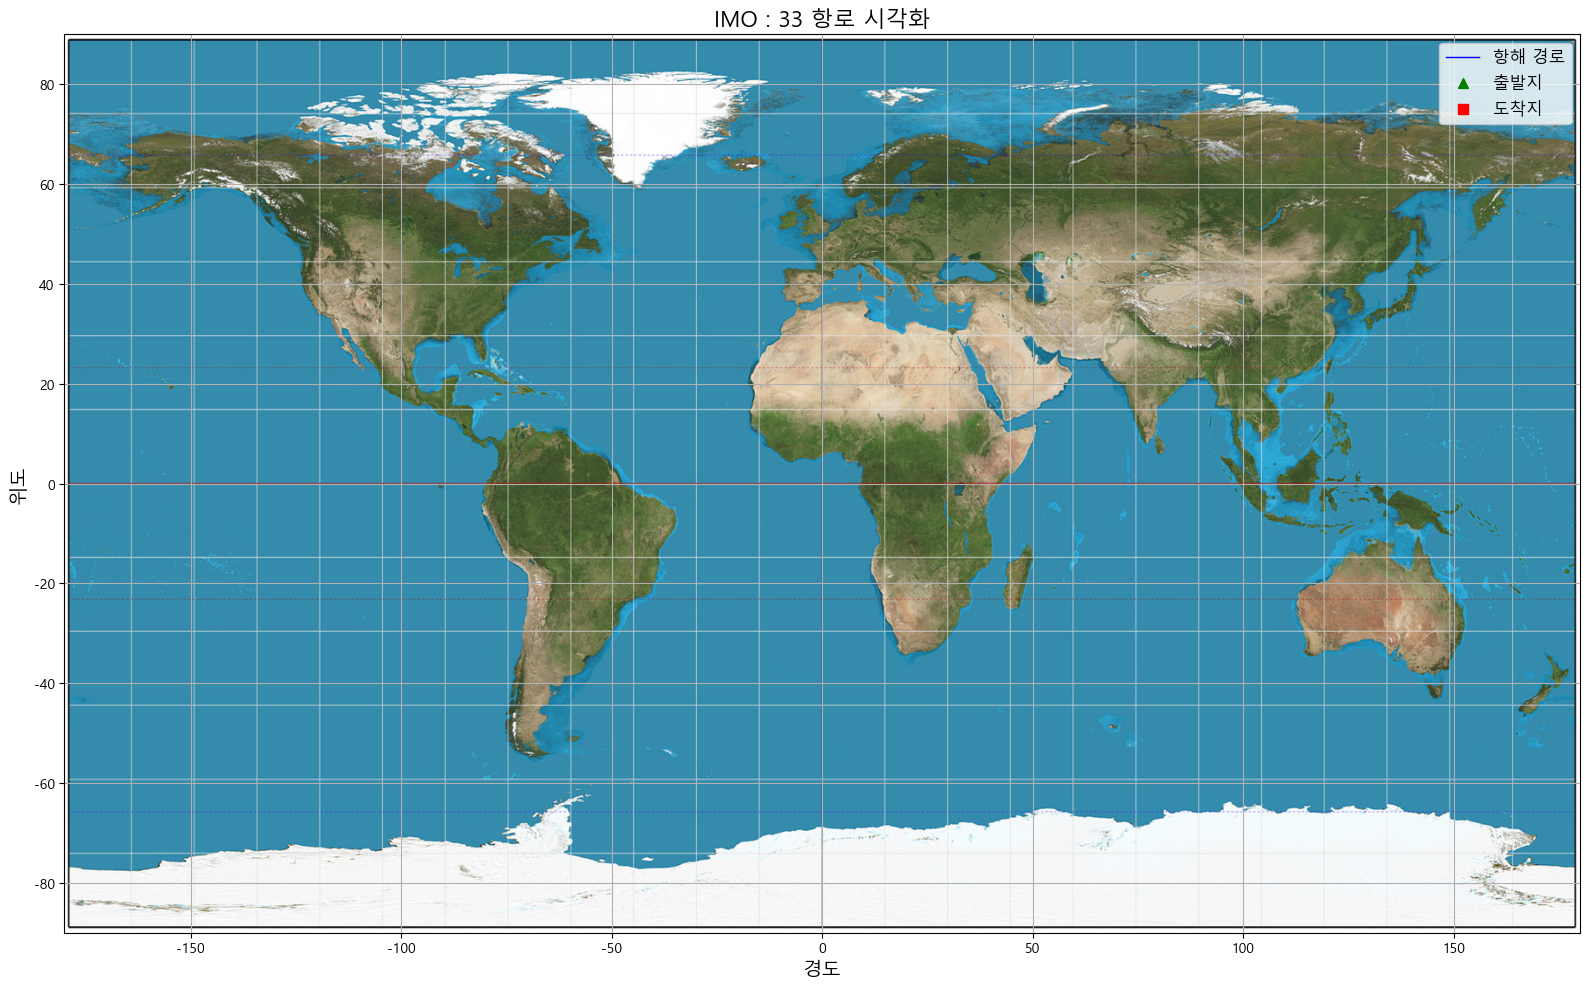

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.image as mpimg
import numpy as np

# 현재 작업 디렉토리 확인
current_dir = os.getcwd()
print(f"현재 작업 디렉토리: {current_dir}")

# vessel_data 디렉토리 확인
vessel_data_dir = os.path.join(os.path.dirname(current_dir), "vessel_data")
if os.path.exists(vessel_data_dir):
    print(f"vessel_data 디렉토리 존재: {vessel_data_dir}")
    # 디렉토리 내 파일 목록 확인
    files = os.listdir(vessel_data_dir)
    print("디렉토리 내 파일 목록:")
    for file in files:
        print(f" - {file}")
else:
    print(f"vessel_data 디렉토리가 존재하지 않습니다: {vessel_data_dir}")
    # 상위 디렉토리 확인
    parent_dir = os.path.dirname(current_dir)
    print(f"상위 디렉토리: {parent_dir}")
    if os.path.exists(parent_dir):
        print("상위 디렉토리 내 파일 및 폴더 목록:")
        for item in os.listdir(parent_dir):
            item_path = os.path.join(parent_dir, item)
            if os.path.isdir(item_path):
                print(f" - [폴더] {item}")
            else:
                print(f" - [파일] {item}")

# 가능한 파일 경로 시도
possible_paths = [
    "../vessel_data/탱커선_IMO_33_통합데이터_한글컬럼.csv",  # 원래 경로
    "./vessel_data/탱커선_IMO_33_통합데이터_한글컬럼.csv",  # 현재 디렉토리 기준
    os.path.join(os.path.dirname(current_dir), "vessel_data", "탱커선_IMO_33_통합데이터_한글컬럼.csv"),  # 절대 경로
    "../vessel_data/벌커선+선박별+Co2+Nox+발생량+데이터+셋+한글컬럼.csv",  # 다른 가능한 파일명
    "../vessel_data/벌커선_선박별_Co2_Nox_발생량_데이터_셋_한글컬럼.csv"   # '+' 대신 '_' 사용
]

# 존재하는 파일 찾기
file_found = False
for path in possible_paths:
    if os.path.exists(path):
        file_path = path
        file_found = True
        print(f"✅ 파일을 찾았습니다: {file_path}")
        break

if not file_found:
    print("❌ 어떤 경로에서도 파일을 찾을 수 없습니다.")
    print("아래 코드를 실행하여 파일을 생성합니다(데이터가 있는 경우).")
    
    # 이전 코드(route_map.ipynb)에서 확인한 파일 생성 코드
    try:
        # 경로 확인
        vessel_data_dir = os.path.join(os.path.dirname(current_dir), "vessel_data")
        if not os.path.exists(vessel_data_dir):
            os.makedirs(vessel_data_dir)
            print(f"✅ vessel_data 디렉토리를 생성했습니다: {vessel_data_dir}")
        
        # 샘플 데이터 생성 (실제 데이터가 없는 경우)
        sample_data = {
            '일자': pd.date_range(start='2023-01-01', periods=100),
            '해상이동무선식별번호': [123456789] * 100,
            '국제해사기구식별번호': [33] * 100,
            '위도': np.random.uniform(20, 40, 100),
            '경도': np.random.uniform(120, 140, 100),
            '속도': np.random.uniform(10, 20, 100),
            '출발시각': pd.date_range(start='2023-01-01', periods=1).repeat(100),
            '출발지위도': [35.0] * 100,
            '출발지경도': [125.0] * 100,
            '도착시각': pd.date_range(start='2023-01-10', periods=1).repeat(100),
            '도착지위도': [25.0] * 100,
            '도착지경도': [135.0] * 100
        }
        
        # 샘플 데이터프레임 생성
        sample_df = pd.DataFrame(sample_data)
        
        # 샘플 파일 저장
        sample_path = os.path.join(vessel_data_dir, "탱커선_IMO_33_통합데이터_한글컬럼.csv")
        sample_df.to_csv(sample_path, index=False, encoding='utf-8')
        print(f"✅ 샘플 데이터를 생성했습니다: {sample_path}")
        
        # 생성한 파일 경로 사용
        file_path = sample_path
        file_found = True
        
    except Exception as e:
        print(f"❌ 샘플 데이터 생성 중 오류 발생: {e}")

# 파일을 찾았거나 생성한 경우 계속 진행
if file_found:
    # CSV 파일 로드
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        print(f"✅ 파일 로드 성공: {file_path}")
        print(f"데이터 크기: {df.shape}")
        
        # 여기서부터 기존 코드 계속...
        # 데이터 기본 정보 출력
        print(f"원본 데이터: {len(df)}개 행 × {len(df.columns)}개 열")
        
        # 이하 기존 코드와 동일...
        
    except UnicodeDecodeError:
        # 인코딩 문제인 경우 다른 인코딩 시도
        encodings = ['utf-8', 'euc-kr', 'cp949']
        for encoding in encodings:
            try:
                df = pd.read_csv(file_path, encoding=encoding)
                print(f"✅ 파일 로드 성공 (인코딩: {encoding})")
                print(f"데이터 크기: {df.shape}")
                break
            except UnicodeDecodeError:
                continue
        else:
            print("❌ 모든 인코딩으로 시도했지만 파일을 읽을 수 없습니다.")
    except Exception as e:
        print(f"❌ 파일 로드 중 오류 발생: {e}")
else:
    print("❌ 파일을 찾거나 생성할 수 없습니다. 원본 데이터 소스를 확인하세요.")